# Lateral fill concept

When regidding datasets for initial conditions, it is necessary to ensure that all model points have data. In many cases, differences between land-sea masks yield regions along the margins that require filling. The `pop_tools.lateral_fill_np_array` routine applies an iterative filling procedure to accomplish this. This is illustrated here.

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import pop_tools

## Generate some psuedo-data with coastline

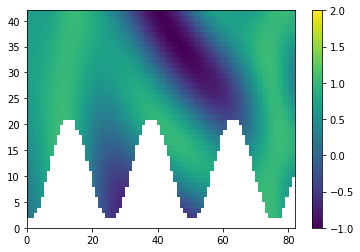

In [2]:
dx, dy = 0.05, 0.05

y, x = np.mgrid[slice(1-dy, 3 + dy, dy),
                slice(1-dx, 5 + dx, dx)]

z_orig = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

valid_points = np.ones(z_orig.shape, dtype=np.bool)
valid_points = np.where(y < 0.5*np.sin(5*x)+1.5, False, valid_points)

z_orig = np.where(~valid_points, np.nan, z_orig)
z_orig[0, :] = np.nan


cb = plt.pcolormesh(z_orig, vmin=-1, vmax=2.)
h = plt.colorbar(cb)

Add missing values in one embayment and a random block in the top of the domain. Put some "blobs" of elevated values to show periodicity.

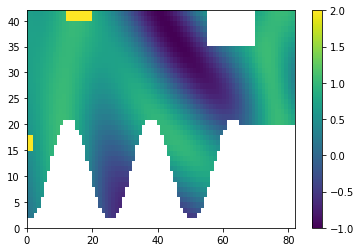

In [3]:
z_miss = z_orig.copy()

z_miss[:20, 62:] = np.nan
z_miss[35:, 55:70] = np.nan

z_miss[15:18, 0:2] = 10.0

z_miss[-2:, 12:20] = 10.0

cb = plt.pcolormesh(z_miss, vmin=-1, vmax=2.)
h = plt.colorbar(cb)

## Perform lateral fill


CPU times: user 400 ms, sys: 19.6 ms, total: 420 ms
Wall time: 418 ms


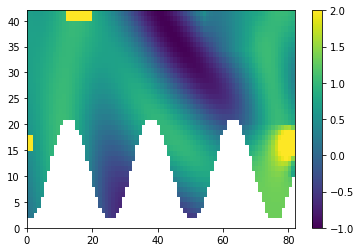

In [4]:
%%time

z_fill = pop_tools.lateral_fill_np_array(z_miss, valid_points, ltripole=False)

plt.figure()
cb = plt.pcolormesh(z_fill, vmin=-1, vmax=2.)
h = plt.colorbar(cb)

Setting `ltripole = True` makes the domain periodic across the top boundary.

CPU times: user 98.4 ms, sys: 3.19 ms, total: 102 ms
Wall time: 99.7 ms


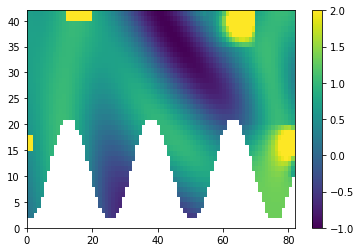

In [5]:
%%time
z_fill = pop_tools.lateral_fill_np_array(z_miss, valid_points, ltripole=True)

plt.figure()
cb = plt.pcolormesh(z_fill, vmin=-1, vmax=2.)
h = plt.colorbar(cb)